In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\Sunny\\Desktop\\Technocolabs\\Data Science Final project\\Mini Project 2\\cleaned_data.csv')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [31]:
df['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

In [32]:
X = df['LIMIT_BAL'].values.reshape(-1,1)
Y= df['default payment next month']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [41]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [42]:
y_predicted = LR.predict_proba(X_test)
y_predicted

array([[0.74826949, 0.25173051],
       [0.5842971 , 0.4157029 ],
       [0.7960448 , 0.2039552 ],
       ...,
       [0.5842971 , 0.4157029 ],
       [0.82721525, 0.17278475],
       [0.66393453, 0.33606547]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [45]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
roc_auc_score(y_test, y_predicted[:,1])

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


<function matplotlib.pyplot.show(*args, **kw)>

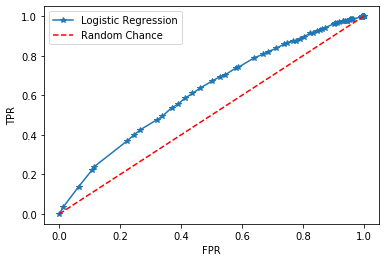

In [56]:
from matplotlib import pyplot as plt
fpr,tpr,thresholds = roc_curve(y_test, y_predicted[:,1])
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['Logistic Regression', 'Random Chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [62]:
precision, recall, threshol1 = precision_recall_curve(y_test, y_predicted[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0, 0.5, 'Recall')

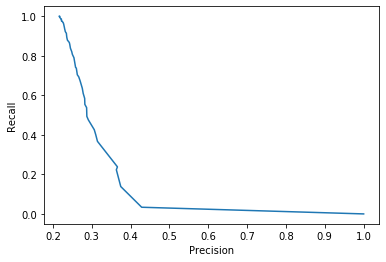

In [65]:
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [70]:
from sklearn.metrics import auc
auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [74]:
X_predicted = LR.predict_proba(X_train)
X_predicted
roc_auc_score(y_train,X_predicted[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
